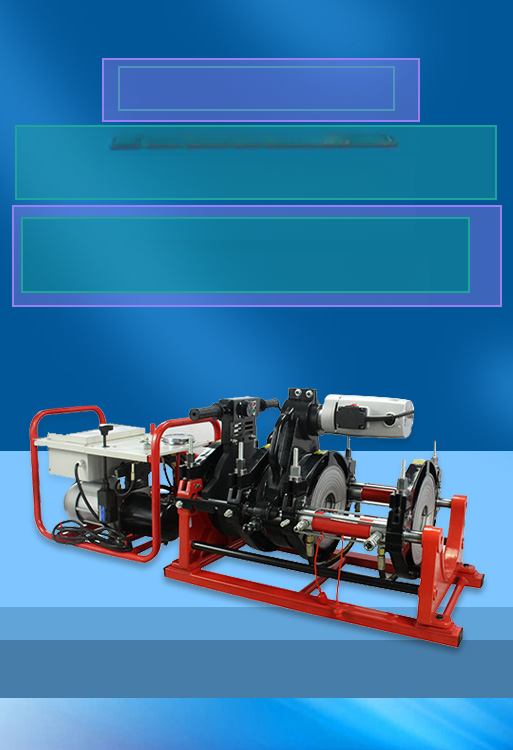

In [1]:
import json
from PIL import Image, ImageDraw
import os
import numpy as np

#DATASET_COLOR = {
#    1: '#929F29', #"#FF0000",       # 빨 , logo 
#    2: '#1FA39A', #"#FFA500",       # 주 , text
#    3: '#987FF2', #"#FFFF00",       # 노 , underlay
#    4: '#F56881', #"#008000"        # 초 , emblishment
#    5: "#0000FF"        # 파
#}

DATASET_COLOR = {
    1: '#929F29', #"#FF0000",       # 빨 , logo 
    2: '#1FA39A', #"#FFA500",       # 주 , text
    3: '#987FF2', #"#FFFF00",       # 노 , underlay
    4: '#F56881', #"#008000"        # 초 , emblishment
    5: "#0000FF"        # 파
} # for DSGAN


box_gt ="/data1/poong/tjfwownd/PosterNUWA/log_dir/train_stage2_with_augment_dino_codellama_pku/generated_sample/20/box.json"
clses_gt = "/data1/poong/tjfwownd/PosterNUWA/log_dir/train_stage2_with_augment_dino_codellama_pku/generated_sample/20/clses.json"
text_order = "/data1/poong/tjfwownd/PosterNUWA/log_dir/train_stage2_with_augment_dino_codellama_pku/generated_sample/20/text_order.json"


with open(box_gt,"r") as f:
    box = json.load(f)
with open(clses_gt,"r") as f:
    cls = json.load(f)

with open(text_order,"r") as f:
    order = json.load(f)

img_dir = "/data1/poong/tjfwownd/PosterNUWA/data/PKU_PosterLayout/train/inpainted_poster"
output_file = f"/data1/poong/tjfwownd/PosterNUWA/log_dir/Paper_samples/LayoutPrompter/PKU"
os.makedirs(os.path.join(output_file,"generated_sample"),exist_ok=True)

save_img= True
for index in range(len(box)):
    boxes = box[index]
    clses = cls[index]

    img_path = order[index]
    
    drawbbox = boxes
    if save_img:
        img = Image.open(os.path.join(img_dir,img_path))
        drawn_outline = img.copy()
        drawn_fill = img.copy()
        draw_ol = ImageDraw.ImageDraw(drawn_outline)
        draw_f = ImageDraw.ImageDraw(drawn_fill)
        
        for b,l in zip(drawbbox,clses):
            draw_ol.rectangle([b[0],b[1],b[2],b[3]], outline=DATASET_COLOR[l], width=2)
        for b,l in zip(drawbbox,clses):
            draw_f.rectangle([b[0],b[1],b[2],b[3]], fill=DATASET_COLOR[l])
        
        drawn_outline = drawn_outline.convert("RGBA")
        drawn_fill = drawn_fill.convert("RGBA")
        drawn_fill.putalpha(int(256 * 0.4))
        img = Image.alpha_composite(drawn_outline, drawn_fill)
        img.save(os.path.join(output_file,"generated_sample",img_path.replace("jpg","png")))

display(img)
